# Proyecto final - Norman Vicente

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from google.colab import drive 
from scipy.stats import norm
from scipy import stats
from numpy import nan
#Sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load
from sklearn import svm
import csv
#Tensorflow
import tensorflow as tf
# DT
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
data = pd.read_csv('data_titanic_proyecto.csv')
#data.tail()

## Exploratory data analysis

In [ ]:
data.shape

(891, 12)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId             0
Name                    0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                0
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

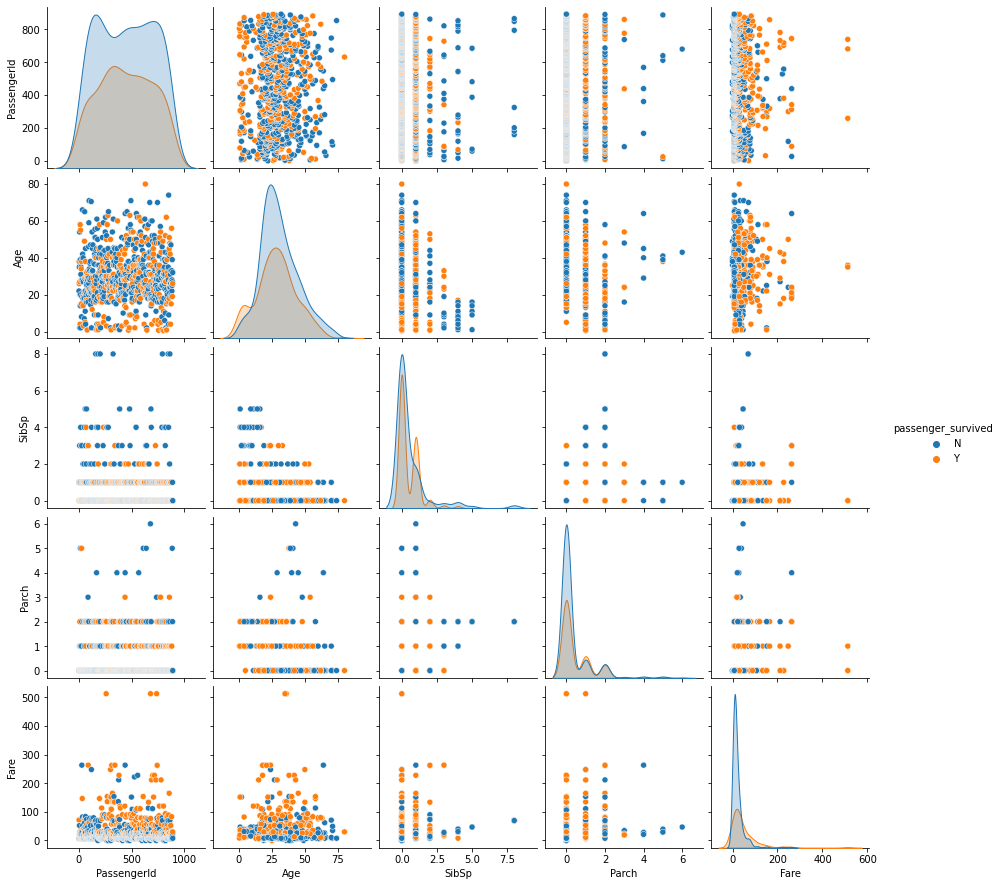

In [ ]:
sns.pairplot(data, hue='passenger_survived');

In [ ]:
#column_names = list(data.columns)

## Missing values



### Age

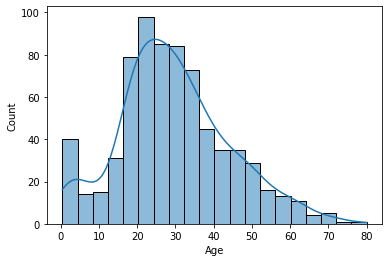

In [4]:
sns.histplot(data['Age'],kde=True)

In [5]:
data['Age'] = np.nan_to_num(data['Age'], nan= np.nanmedian(data['Age']))

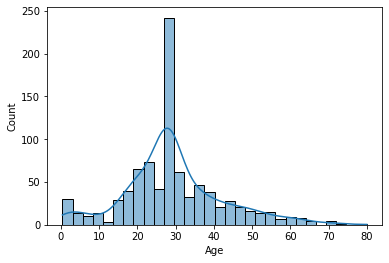

In [6]:
sns.histplot(data['Age'],kde=True)

### Embarked

In [7]:
data['Embarked'] = data['Embarked'].fillna('S')

## Categorical encoding

In [8]:
data.groupby("Embarked")['PassengerId'].count()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

In [9]:
data.groupby("passenger_survived")['PassengerId'].count()

passenger_survived
N    549
Y    342
Name: PassengerId, dtype: int64

In [10]:
data.groupby("passenger_class")['PassengerId'].count()

passenger_class
Lower     491
Middle    184
Upper     216
Name: PassengerId, dtype: int64

In [11]:
data.groupby("passenger_sex")['PassengerId'].count()

passenger_sex
F    314
M    577
Name: PassengerId, dtype: int64

In [12]:
data = data.join(pd.get_dummies(data.passenger_sex, prefix='passenger_sex'))
data = data.join(pd.get_dummies(data.passenger_class, prefix='passenger_class'))
data = data.join(pd.get_dummies(data.Embarked, prefix='Embarked'))

### Label enconding

In [13]:
label_encoder = preprocessing.LabelEncoder()
#data['passenger_sex'] = label_encoder.fit_transform(data['passenger_sex']) 
#data['passenger_class'] = label_encoder.fit_transform(data['passenger_class'])
data['passenger_survived'] = label_encoder.fit_transform(data['passenger_survived'])
#data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [14]:
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,passenger_sex_F,passenger_sex_M,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,0,0,1,1,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,1,1,0,0,0,1,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,1,1,0,1,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,1,1,0,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,0,0,1,1,0,0,0,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Name                    891 non-null    object 
 2   Age                     891 non-null    float64
 3   SibSp                   891 non-null    int64  
 4   Parch                   891 non-null    int64  
 5   Ticket                  891 non-null    object 
 6   Fare                    891 non-null    float64
 7   Cabin                   204 non-null    object 
 8   Embarked                891 non-null    object 
 9   passenger_class         891 non-null    object 
 10  passenger_sex           891 non-null    object 
 11  passenger_survived      891 non-null    int64  
 12  passenger_sex_F         891 non-null    uint8  
 13  passenger_sex_M         891 non-null    uint8  
 14  passenger_class_Lower   891 non-null    ui

## Scores

In [16]:
del data['Ticket']
del data['Cabin']
del data['Name']
del data['PassengerId']
del data['Embarked']
del data['passenger_sex']
del data['passenger_class']

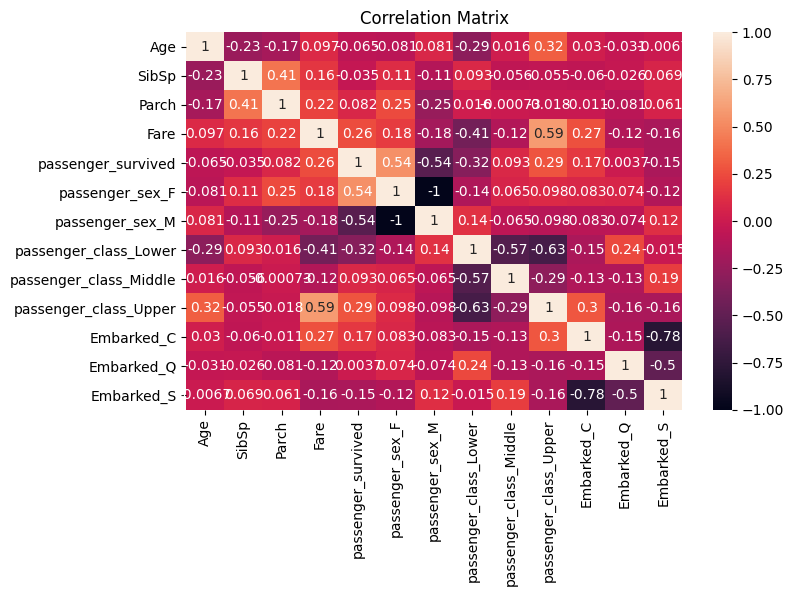

In [17]:
plt.figure(dpi=100, figsize=(8, 5))
ax = plt.axes()
sns.heatmap(data.corr(), annot=True, ax = ax)
ax.set_title('Correlation Matrix')
plt.show()

In [18]:
def make_mi_scores(X, Y):
    mi_scores = mutual_info_regression(X, Y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

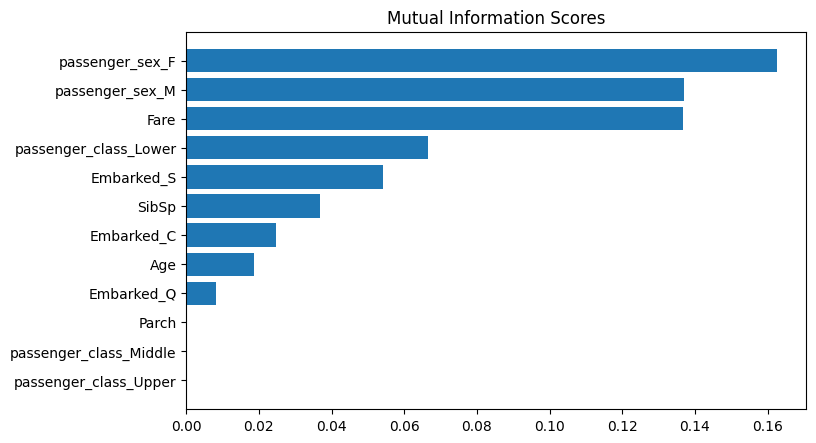

In [19]:
X = data.copy()
Y = X.pop("passenger_survived")
mi_scores = make_mi_scores(X, Y)
mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Train-Val-Test split 

* Train (80%)
* Val (10%)
* Test (10%)




In [20]:
print(X.shape, Y.shape)

(891, 12) (891,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [22]:
print(x_train.shape, x_test.shape)

(712, 12) (179, 12)


In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,random_state=10)

In [24]:
print(x_train.shape, x_val.shape)

(569, 12) (143, 12)


In [25]:
y_test_reshaped = y_test.values.reshape((y_test.shape[0], 1))

oneHot = OneHotEncoder()
oneHot.fit(y_test_reshaped)
y_test_transformed = oneHot.transform(y_test_reshaped).toarray()

In [26]:
sc= StandardScaler()
x_test_scaled = sc.fit_transform(x_test)

## Bootstrap sampling

In [27]:
x_train_m1, y_train_m1 = resample(x_train, y_train, n_samples = x_train.shape[0])
x_train_m2, y_train_m2 = resample(x_train, y_train, n_samples = x_train.shape[0])
x_train_m3, y_train_m3 = resample(x_train, y_train, n_samples = x_train.shape[0])
x_train_m4, y_train_m4 = resample(x_train, y_train, n_samples = x_train.shape[0])

## Ensemble Learining

In [249]:
column_names = list(X.columns)
column_names

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'passenger_sex_F',
 'passenger_sex_M',
 'passenger_class_Lower',
 'passenger_class_Middle',
 'passenger_class_Upper',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

### Log of experiments

In [28]:
def saveExperiment(row):        
  headers = ['model', 'acc', 'prec']
  #with open('experiments.csv', 'a', encoding='UTF8') as f:
   # writer = csv.writer(f)
    #writer.writerow(headers)
  with open('experiments.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(row)

In [37]:
class Models:

  def metrics(self, y_true, y_pred, model_str):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precission = metrics.precision_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precission)
    print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
    experiment = [model_str, accuracy, precission]
    saveExperiment(experiment)

  def decision_tree(self, x_values, y_values):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10, min_samples_leaf=25)
    return tree.fit(x_values,y_values)

  def predict_decision_tree(self, x_val, y_val, model):
    tree_y_pred = model.predict(x_val)
    return tree_y_pred, self.metrics(y_val, tree_y_pred, "decision_tree/entropy/md=7/msl=15")

  def naive_bayes(self, x_values, y_values):
    bayes = GaussianNB()
    return bayes.fit(x_values,y_values)
    
  def predict_naive_bayes(self, x_val, y_val, model):
    bayes_y_pred = model.predict(x_val)
    return bayes_y_pred, self.metrics(y_val, bayes_y_pred, "gaussian_bayes")

  def svm(self, x_values, y_values):
    clf_svm = svm.SVC(kernel='linear')
    return clf_svm.fit(x_values, y_values)
   
  def predict_svm(self, x_val, y_val, model):
    svm_y_pred = model.predict(x_val)
    return svm_y_pred, self.metrics(y_val, svm_y_pred, "linear_svm")



In [38]:
model =  Models()

### Decision tree

In [39]:
tree = model.decision_tree(x_train_m1, y_train_m1)
model.predict_decision_tree(x_val, y_val, tree)
dump(tree, 'models/decision_tree_entropy_md=7_msl_15.joblib')

Accuracy: 0.8041958041958042
Precision: 0.9024390243902439
Confusion Matrix: 
 [[78  4]
 [24 37]]


['models/decision_tree_entropy_md=7_msl_15.joblib']

### Naive bayes

In [33]:
bayes = model.naive_bayes(x_train_m2, y_train_m2)
model.predict_naive_bayes(x_val, y_val, bayes)
dump(tree, 'models/gaussian_bayes.joblib')

Accuracy: 0.7552447552447552
Precision: 0.75
Confusion Matrix: 
 [[69 13]
 [22 39]]


['models/gaussian_bayes.joblib']

### SVM

In [34]:
clf_svm = model.svm(x_train_m3, y_train_m3)
model.predict_svm(x_val, y_val, clf_svm)
dump(tree, 'models/linear_svm.joblib')

Accuracy: 0.8111888111888111
Precision: 0.8269230769230769
Confusion Matrix: 
 [[73  9]
 [18 43]]


['models/linear_svm.joblib']

### Regresion logistica binaria

#### Reshaped, OHE: y_train

In [42]:
y_train_reshaped = y_train_m4.values.reshape((y_train_m4.shape[0], 1))

In [43]:
oneHot = OneHotEncoder()
oneHot.fit(y_train_reshaped)
y_train_transformed = oneHot.transform(y_train_reshaped).toarray()

#### Scaled x_train

In [44]:
sc= StandardScaler()
x_train_scaled = sc.fit_transform(x_train_m4)

In [45]:
class logistic_regression:

  def acurracy(self, y_pred):
    return tf.reduce_mean(tf.cast(y_pred, tf.float32))

  def acurracy(self, y_pred):
    return tf.reduce_mean(tf.cast(y_pred, tf.float32))

  def hyp(self, x, W, b):
    return tf.nn.sigmoid(tf.add(tf.matmul(x, W), b))

  def prediction(self, y_hat, y):
    return tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))

  def cross_entropy(self, y_true, y_hat):
    return  tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat,labels=y_true))

In [46]:
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    lg = logistic_regression()
    D=x_train_scaled.shape[1]
    x = tf.placeholder(tf.float32, [None, D]) 
    y = tf.placeholder(tf.float32, [None, 2]) 
    learning_rate = tf.placeholder("float")
    W = tf.Variable(tf.random_normal((D,2)), name = "W", dtype="float") 
    b = tf.Variable(tf.random_normal((1,2)), name = "b", dtype="float") 

    with tf.name_scope("Logistic_Regression"):
        y_hat = lg.hyp(x, W, b)
    with tf.name_scope("Cost_Function"):
        cross_entropy = lg.cross_entropy(y, y_hat)
        cross_summary = tf.summary.scalar('Cost_summary', cross_entropy)
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy) 
    with tf.name_scope("Accuracy"):
        prediction = lg.prediction(y_hat, y)
        accuracy = lg.acurracy(prediction)
        accuracy_summary = tf.summary.scalar('Accuracy_summary', accuracy)
    summaries = tf.summary.merge_all()
    init = tf.global_variables_initializer()

In [74]:
def training(lr,batch_size,epochs,x_values, y_train_gg):
    tf.reset_default_graph()
    number_batches = int(len(y_train_gg)/batch_size)
    now = datetime.now()
    with tf.Session(graph=g) as sess: 
        acc = 0
        writer = tf.summary.FileWriter("s/lr="+str(lr)+"bs="+str(batch_size)+"ep="+str(epochs), sess.graph)
        model_str = "RegresionLogisticaEsc/lr="+str(lr)+"/bs="+str(batch_size)+"/ep="+str(epochs)  
        sess.run(init) 
        for epoch in range(epochs): 
            for batch in range(number_batches):
                init_value = batch*(batch_size)
                X = x_values[init_value:init_value+batch_size-1]
                Y = y_train_gg[init_value:init_value+batch_size-1]
                sess.run(train_step, feed_dict = {x : X, y : Y,learning_rate:lr}) 
            if (epoch + 1) % 20 == 0: 
                co,beta_0,beta_1,acc,summ= sess.run([cross_entropy,W,b,accuracy,summaries],feed_dict = {x : X, y : Y,learning_rate:lr}) 
                print("Epoch", (epoch + 1), ": cost =", co, " accuracy: ",acc) 
                writer.add_summary(summ, epoch+1)
                        
        experiment = [model_str, acc, 70] 
        saveExperiment(experiment) 
        saveModel(model_str)              
        writer.close()
    return (beta_0, beta_1)

In [48]:
m, b = training(0.015,32,4300,x_train_scaled, y_train_transformed)

Epoch 4220 : cost = 0.5487084  accuracy:  0.9032258
Epoch 4240 : cost = 0.5487138  accuracy:  0.9032258
Epoch 4260 : cost = 0.5487195  accuracy:  0.9032258
Epoch 4280 : cost = 0.5487256  accuracy:  0.9032258
Epoch 4300 : cost = 0.5487322  accuracy:  0.9032258


In [61]:
#%load_ext tensorboard
#%tensorboard --logdir s

### Export model

In [73]:
def saveModel(str):        
  np.save("models/"+str+"_b.npy", b)
  np.save("models/"+str+"_m.npy", m)

In [81]:
data.to_csv(r'data_filtered.csv', index = False)

## Prueba/Evaluación final:

In [83]:
model1_y_pred, _ = model.predict_decision_tree(x_test, y_test, tree)

Accuracy: 0.8044692737430168
Precision: 0.8541666666666666
Confusion Matrix: 
 [[103   7]
 [ 28  41]]


In [84]:
model2_y_pred,_ = model.predict_decision_tree(x_test, y_test, clf_svm)

Accuracy: 0.7430167597765364
Precision: 0.6825396825396826
Confusion Matrix: 
 [[90 20]
 [26 43]]


In [85]:
model3_y_pred, _ = model.predict_naive_bayes(x_test, y_test, bayes)

Accuracy: 0.7374301675977654
Precision: 0.6571428571428571
Confusion Matrix: 
 [[86 24]
 [23 46]]


In [86]:
def predict_logistic_regression(x_test, weights, bias):
    tf.reset_default_graph()
    
    W = tf.placeholder(tf.float32, shape = [None, None], name = "W")
    b = tf.placeholder(tf.float32, shape = [None, None], name = "X")
    x = tf.placeholder(tf.float32, shape = [None, None], name = "bias")
    
    logits = tf.add(tf.matmul(x, W), b)
    sigmoid = tf.nn.sigmoid(logits)
    prediction = tf.round(sigmoid)
    
    with tf.train.MonitoredSession() as session:
        feed_dictionary = {x: x_test, W:weights, b:bias}
        
        pred, probs = session.run([prediction, sigmoid], feed_dict= feed_dictionary)
        
        return pred, probs


In [87]:
reg_y_pred,_ =predict_logistic_regression(x_test_scaled, m, b)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [88]:
 y_retransformed = oneHot.inverse_transform(reg_y_pred)
 print("Accuracy:", metrics.accuracy_score(y_test, y_retransformed))

Accuracy: 0.7932960893854749


## Predicciones finales

In [89]:
y_preds = np.stack((model1_y_pred.reshape(179,1),
                    model2_y_pred.reshape(179,1), 
                    model3_y_pred.reshape(179,1), 
                    y_retransformed)).T

In [90]:
final_pred = stats.mode(y_preds[0], axis=1)

In [91]:
#Diagnostico
index = 3
print(model1_y_pred[index], model2_y_pred[index], model3_y_pred[index], y_retransformed[index])

0 1 1 [0]


In [92]:
final_pred[0][index]

array([0])

In [99]:
x_test['y_true'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
x_test['y_pred'] =  final_pred[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
x_test.tail(10)

,Age,SibSp,Parch,Fare,passenger_sex_F,passenger_sex_M,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,Embarked_C,Embarked_Q,Embarked_S,y_true,y_pred
394,24.0,0,2,16.7000,1,0,1,0,0,0,0,1,1,0
173,21.0,0,0,7.9250,0,1,1,0,0,0,0,1,0,0
730,29.0,0,0,211.3375,1,0,0,0,1,0,0,1,1,1
586,47.0,0,0,15.0000,0,1,0,1,0,0,0,1,0,0
701,35.0,0,0,26.2875,0,1,0,0,1,0,0,1,1,0
341,24.0,3,2,263.0000,1,0,0,0,1,0,0,1,1,1
389,17.0,0,0,12.0000,1,0,0,1,0,1,0,0,1,1
691,4.0,0,1,13.4167,1,0,1,0,0,1,0,0,1,1
698,49.0,1,1,110.8833,0,1,0,0,1,1,0,0,0,0
463,48.0,0,0,13.0000,0,1,0,1,0,0,0,1,0,0


## Diagnostico y metricas finales

In [93]:
accuracy = metrics.accuracy_score(y_test, final_pred[0])
precission = metrics.precision_score(y_test, final_pred[0])
f1 = metrics.f1_score(y_test, final_pred[0])
recall = metrics.recall_score(y_test, final_pred[0])
cf= confusion_matrix(y_test, final_pred[0])

In [94]:
h = {'Accuracy': accuracy, 'Precision':precission, 'F1': f1, 'Recall': recall },
final_metrics = pd.DataFrame(h, index=["Modelo final"])   

In [95]:
confusion_matrix = pd.DataFrame(data=cf, index=["Positivos", "Negativos"])

In [96]:
print("--------------Metricas finales----------------")
print("Accuracy:", accuracy)
print("Precision:", precission)
print("F1:", f1)
print("Recall:", recall)
print("Confusion Matrix: \n", cf)

--------------Metricas finales----------------
Accuracy: 0.7988826815642458
Precision: 0.8666666666666667
F1: 0.6842105263157895
Recall: 0.5652173913043478
Confusion Matrix: 
 [[104   6]
 [ 30  39]]


In [97]:
final_metrics

,Accuracy,Precision,F1,Recall
Modelo final,0.798883,0.866667,0.684211,0.565217


In [98]:
confusion_matrix

,0,1
Positivos,104,6
Negativos,30,39


## Conclusiones

- Durante el proyecto tuve que regresar a revisar las presentaciones y laboratorios pasados ya que no me quedaba claro como hacer algunas cosas pero durante el proceso de desarrollo justo como dice el Ing. Leal, machine learning es un proceso interativo y no un proceso lineal deterministico.

- Tuve que regresar al principio muchas veces para poder probar distintas maneras de obtener el porcentaje de las metricas deseadas.

- En el proceso de feature engineering comenze trabajando con label encoding pero al final obtuve mejores resultados usando one hot enconding.

- Para la regresion logistica hice los primeros experimentos con los datos sin normalizar pero despues de aplicar la normalizacion pude ver mejores resultados.

- Durante el proyecto pude poner en practica la teoria que vimos en clase y complementarla con la experimentacion de estos algoritmos para encontrar el valor optimo esto me ayudo a entender como esque funcionan internamente y no solo hacer el uso de librerias.

## Recomendaciones

- Para la regresion logistica es muy recomendable ir monitoreando las metricas de error y accuracy conforme a los experimentos realizados aparte de ir imprimiendo el error cada cierta epoca.
- Probar distintos tipos de feature engineering para las variables categoricas ya que se obtienen resultados distintos.
- Para SVM ir probando distintos kernel hasta encontrar el optimo.
 